In [84]:
#Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
from datetime import datetime
import datetime
import time
import timestring
import math
import scipy
matplotlib.rcParams['figure.figsize'] = (14, 8)

In [85]:
year = '2017'
origin = 'SFO'
dest = 'SFO'

In [86]:
#read in the csv file for desired year
df = pd.read_csv(f'./Data/{year}.csv')

In [87]:
#remove rows with NaN values ~1.5% of data 
df = df.dropna(subset=['DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME'])

In [88]:
df_dest = df[df.DEST == dest]

In [90]:
df = df[df.ORIGIN == origin]

In [91]:
df_dest.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,...,ARR_DELAY,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
68,2017,3,21,2,2017-03-21,B6,FLL,"Fort Lauderdale, FL",FL,SFO,...,-2.0,0.0,365.0,335.0,2584.0,NaN,NaN,NaN,NaN,NaN
89,2017,3,21,2,2017-03-21,B6,JFK,"New York, NY",NY,SFO,...,-8.0,0.0,402.0,366.0,2586.0,NaN,NaN,NaN,NaN,NaN
161,2017,3,21,2,2017-03-21,B6,LGB,"Long Beach, CA",CA,SFO,...,-7.0,0.0,81.0,55.0,354.0,NaN,NaN,NaN,NaN,NaN
199,2017,3,21,2,2017-03-21,B6,BOS,"Boston, MA",MA,SFO,...,7.0,7.0,418.0,388.0,2704.0,NaN,NaN,NaN,NaN,NaN
224,2017,3,21,2,2017-03-21,B6,JFK,"New York, NY",NY,SFO,...,0.0,0.0,413.0,385.0,2586.0,NaN,NaN,NaN,NaN,NaN


In [92]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,...,ARR_DELAY,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
48,2017,3,21,2,2017-03-21,B6,SFO,"San Francisco, CA",CA,BOS,...,-30.0,0.0,315.0,286.0,2704.0,NaN,NaN,NaN,NaN,NaN
69,2017,3,21,2,2017-03-21,B6,SFO,"San Francisco, CA",CA,FLL,...,58.0,58.0,307.0,288.0,2584.0,58.0,0.0,0.0,0.0,0.0
90,2017,3,21,2,2017-03-21,B6,SFO,"San Francisco, CA",CA,JFK,...,-45.0,0.0,306.0,284.0,2586.0,NaN,NaN,NaN,NaN,NaN
160,2017,3,21,2,2017-03-21,B6,SFO,"San Francisco, CA",CA,LGB,...,-6.0,0.0,82.0,60.0,354.0,NaN,NaN,NaN,NaN,NaN
200,2017,3,21,2,2017-03-21,B6,SFO,"San Francisco, CA",CA,BOS,...,-24.0,0.0,320.0,289.0,2704.0,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170943 entries, 48 to 5674620
Data columns (total 32 columns):
YEAR                   170943 non-null int64
MONTH                  170943 non-null int64
DAY_OF_MONTH           170943 non-null int64
DAY_OF_WEEK            170943 non-null int64
FL_DATE                170943 non-null object
OP_CARRIER             170943 non-null object
ORIGIN                 170943 non-null object
ORIGIN_CITY_NAME       170943 non-null object
ORIGIN_STATE_ABR       170943 non-null object
DEST                   170943 non-null object
DEST_CITY_NAME         170943 non-null object
DEST_STATE_ABR         170943 non-null object
CRS_DEP_TIME           170943 non-null int64
DEP_TIME               170943 non-null float64
DEP_DELAY              170943 non-null float64
DEP_DELAY_NEW          170943 non-null float64
TAXI_OUT               170943 non-null float64
WHEELS_OFF             170943 non-null float64
WHEELS_ON              170943 non-null float64
TAXI_IN     

Below code converts objects into catagorical values. CAUTION, when filtering dataframes on catagorically encoded values, catagorical values will remain in the dataframe after filtering!

In [6]:
#Optimize performance
#convert the object columns to categorical
cat_label = lambda x: x.astype('category')
objects = ['FL_DATE','OP_CARRIER', 'ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR', 'DEST','DEST_CITY_NAME',
           'DEST_STATE_ABR']
df[objects] = df[objects].apply(cat_label, axis=0)

#reduce the size of integer columns
convert_int = lambda x: pd.to_numeric(x, downcast='unsigned')
integers = ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'CRS_ARR_TIME']
df[integers] = df[integers].apply(convert_int, axis=0)

#reduce the size of float columns
convert_float = lambda x: pd.to_numeric(x, downcast='float')
floats = ['DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
          'TAXI_IN','ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 
          'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df[floats] = df[floats].apply(convert_float, axis=0)

#### Split the data into appropriate delay intervals

In [11]:
#all arrival delays
delays = df[df.ARR_DELAY > 0]
#arrival delays more than 15 minutes
delays_15 = df[df.ARR_DELAY > 15]
#arrival delays longer than 4 hrs
delays_4hr = df[df.ARR_DELAY / 60 >=4]
#arrival delays more than 15mins and less than 4 hrs
delays_15_4 = df[(df.ARR_DELAY / 60 < 4) & (df.ARR_DELAY > 15)]

In [12]:
df.YEAR.count()

170943

In [13]:
delays_15.YEAR.count()

41733

In [14]:
delays_15.YEAR.count() / df.YEAR.count()

0.2441340095821414

# EDA 

## Distribution of Arrival Delays for all flights (includes negative values for early flights)

(-100, 200)

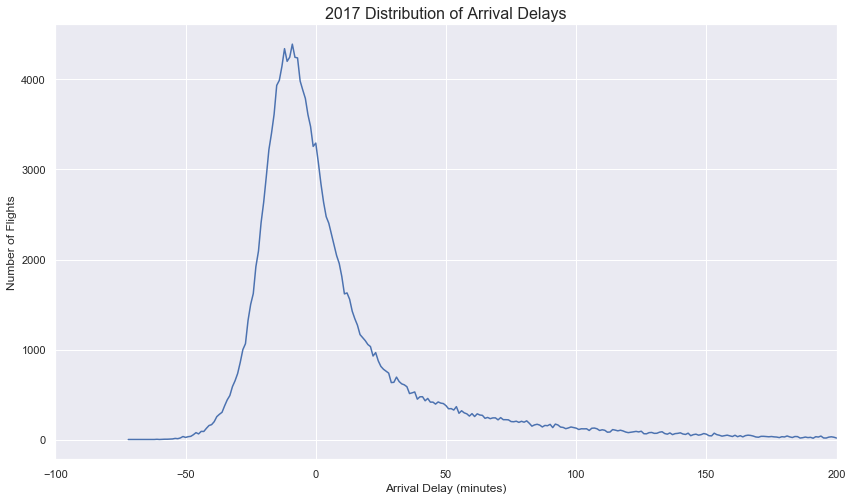

In [21]:
df.groupby('ARR_DELAY').size().plot()
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('2017 Distribution of Arrival Delays', fontsize=16)
plt.xlim(-100,200)

In [17]:
scipy.stats.skew(df['ARR_DELAY'])

5.796223469870946

In [19]:
df.ARR_DELAY.describe()

count    170943.000000
mean          9.414150
std          46.531156
min         -72.000000
25%         -14.000000
50%          -3.000000
75%          15.000000
max        1456.000000
Name: ARR_DELAY, dtype: float64

## Distribution of long flights vs short flights

In [22]:
short_route = df[df.AIR_TIME < 180]
long_route = df[df.AIR_TIME >= 180]

Short flight average delay: 11.616986196319019
Long flight average delay: 5.964892004262792


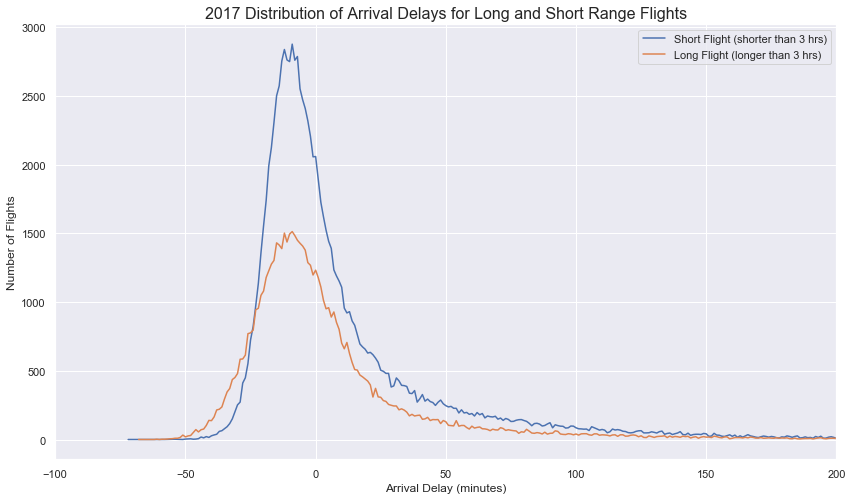

In [23]:
short_route.groupby('ARR_DELAY').size().plot()
long_route.groupby('ARR_DELAY').size().plot()
plt.xlim(-100,200)
plt.ylabel('Number of Flights')
plt.title('2017 Distribution of Arrival Delays for Long and Short Range Flights', fontsize=16)
plt.xlabel('Arrival Delay (minutes)')
plt.legend(['Short Flight (shorter than 3 hrs)', 'Long Flight (longer than 3 hrs)'])

print(f'Short flight average delay: {short_route.ARR_DELAY.mean()}')
print(f'Long flight average delay: {long_route.ARR_DELAY.mean()}')

### The distribution of arrival delays is heavily skewed, with majority of the arrivals being on-time or early. 
#### One possible way to model the data is to classify if a flight will be delayed or not with a probability. Then we can use linear regreassion or random forrests to determine the length of delay

## Distribution of delayed flights by airline:

In [24]:
print(f'Arrival Delay Mean: {df.ARR_DELAY.mean()}')
print(f'Arrival Delay Median: {df.ARR_DELAY.median()}')
print(f'Arrival Delay Standard Deviation: {df.ARR_DELAY.std()}')

Arrival Delay Mean: 9.414149745821707
Arrival Delay Median: -3.0
Arrival Delay Standard Deviation: 46.53115591257949


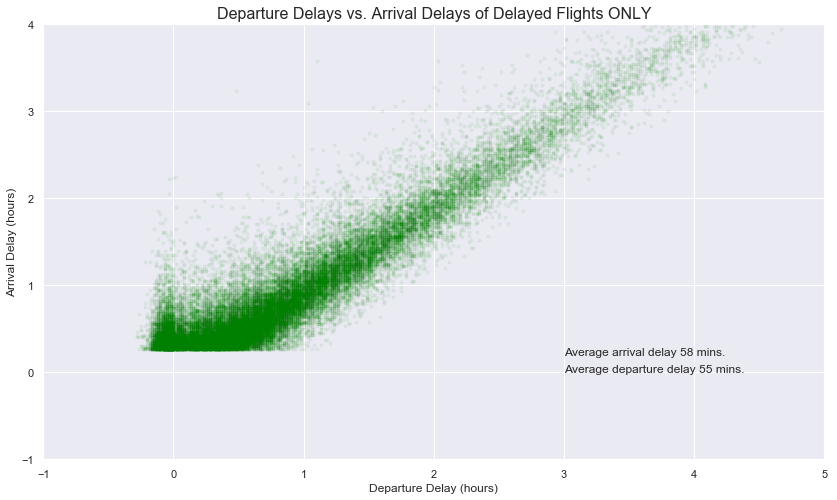

In [25]:
plt.plot(delays_15_4.DEP_DELAY / 60, delays_15_4.ARR_DELAY / 60, marker='.', linestyle='None', alpha = 0.05, color='green')
plt.xlim([-1, 5])
plt.ylim([-1, 4])
plt.xlabel('Departure Delay (hours)')
plt.ylabel('Arrival Delay (hours)')
plt.text(3, 0, f"Average departure delay {round((delays_15_4.DEP_DELAY).mean())} mins.")
plt.text(3, 0.2, f"Average arrival delay {round((delays_15_4.ARR_DELAY).mean())} mins.")
plt.title('Departure Delays vs. Arrival Delays of Delayed Flights ONLY', fontsize=16)
plt.show()

### There is a distinct linear relationship between departure delay and arrival delay, which makes sense. This means  we can also analyze departure delays and causes to predict arrival delays. We also see a small spike around the area of early departure or on time departure but late arrival. This is most likely due to airlines trying to get out on time even though they may be impacted by traffic at the airport, air traffic controll, or even weather. As such, arrival time may still be impacted

# A glimpse at the carrier performance throughout the year

In [26]:
#split the data into delayed flights (>15min. on arrival per FAA) and non-delayed flights
#we then sort the data by index in order to be able to get a ratio of delayed flights
flights_by_carrier = df.groupby('OP_CARRIER').size().sort_index()
flights_by_carrier_del = delays_15.groupby('OP_CARRIER').size().sort_index()
percent_delay = flights_by_carrier_del / flights_by_carrier

sorted_flights = flights_by_carrier.sort_values(ascending=False)
sorted_flights_del = flights_by_carrier_del.sort_values(ascending=False)

#When creating above dataframes we need to make sure that they all have the same index values so we can
#visualize the data correctly.
####use the same index for all data####
sorted_flights_del = sorted_flights_del.get(sorted_flights.index)
percent_delay = percent_delay.get(sorted_flights.index)

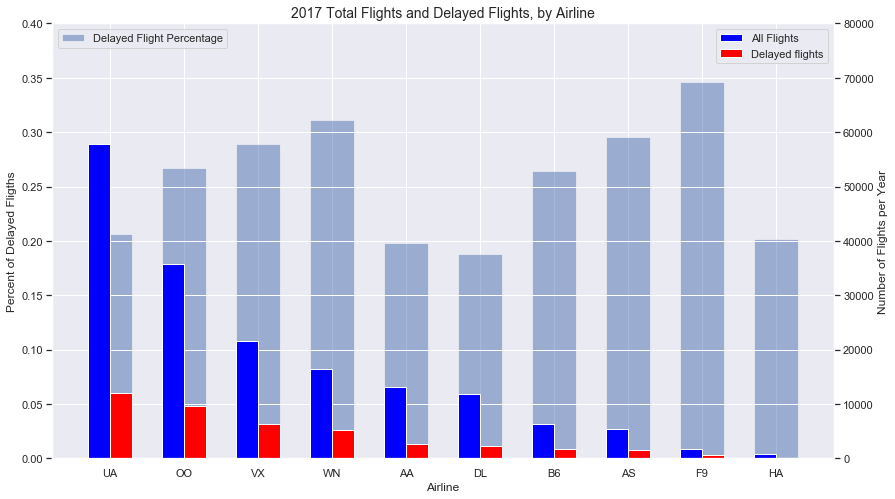

In [32]:
ax = plt.subplot(111)
ax.bar(sorted_flights.index, percent_delay, width=0.6, align='center', alpha=0.5)
plt.xlabel('Airline')
plt.ylabel('Percent of Delayed Fligths')
plt.legend(['Delayed Flight Percentage'], loc='upper left')
plt.ylim(0,0.4)

ax2 = ax.twinx()
ax2.bar(sorted_flights.index, sorted_flights, width=-0.3, align='edge', color='blue')
ax2.bar(sorted_flights_del.index, sorted_flights_del, width=0.3, align='edge', color='red')
plt.legend(['All Flights', 'Delayed flights'])
plt.xlabel('Airline')
plt.ylabel('Number of Flights per Year')
plt.title(f'{year} Total Flights and Delayed Flights, by Airline', fontsize=14)
plt.ylim(0,80_000)
plt.show()

### Above chart shows the total number of flights, delayed flights, and the ratio of delayed flights broken down by airline. We can break this down by individual airline and look at top airport and top region performance

In [33]:
#Airline codes with names for cleaner presentation
airline_codes = pd.read_csv('L_CARRIER_HISTORY.csv')
airline_dict = airline_codes.set_index('Code').to_dict()['Description']

### Let's visualize arrival delay distribution by carrier. 
#### We'll need to cap the arrival delay to 60 minutes to be able to view the data due to the extreme outliers.

In [34]:
#create a dataframe from existing data containing only the columns we need
df_carriers = df[['OP_CARRIER', 'ORIGIN', 'DEST', 'ARR_DELAY']]

In [35]:
#add the airline names for easier interpretation 
df_carriers = pd.merge(df_carriers, airline_codes, how='left', left_on='OP_CARRIER', right_on='Code')

In [36]:
df_carriers['ARR_DELAY'] = df_carriers['ARR_DELAY'].apply(lambda x: 60 if x>=60 else x)
df_carriers['ARR_DELAY'] = df_carriers['ARR_DELAY'].apply(lambda x: -60 if x<=-60 else x)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


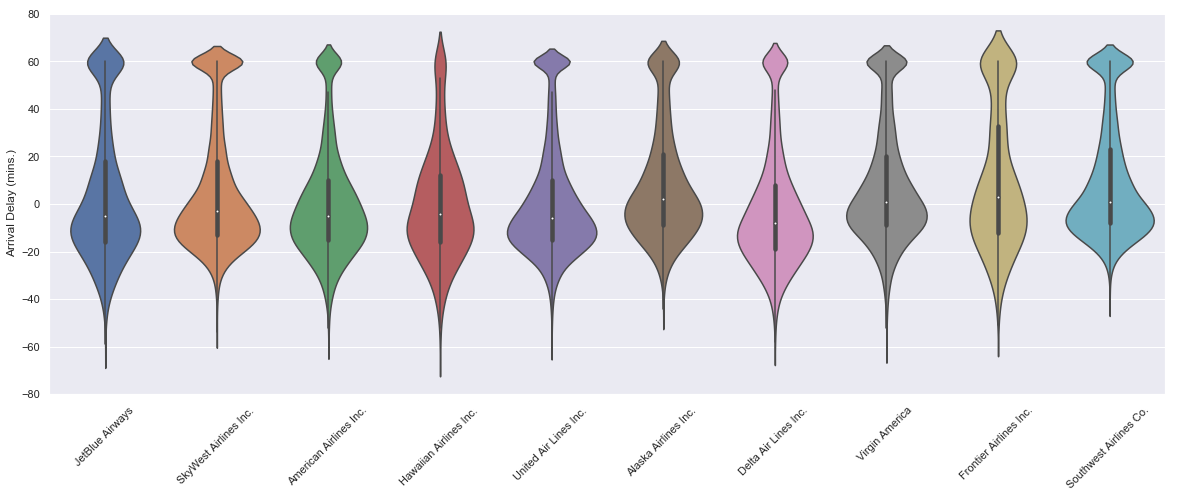

In [37]:
#visualize the data
plt.figure(figsize=(20,7))
ax = sns.violinplot(x='Description', y='ARR_DELAY', data=df_carriers)
ax.set_ylabel('Arrival Delay (mins.)')
ax.set_xlabel('')
label = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Text(0.5, 1.0, 'Arrival Delay Distribution')

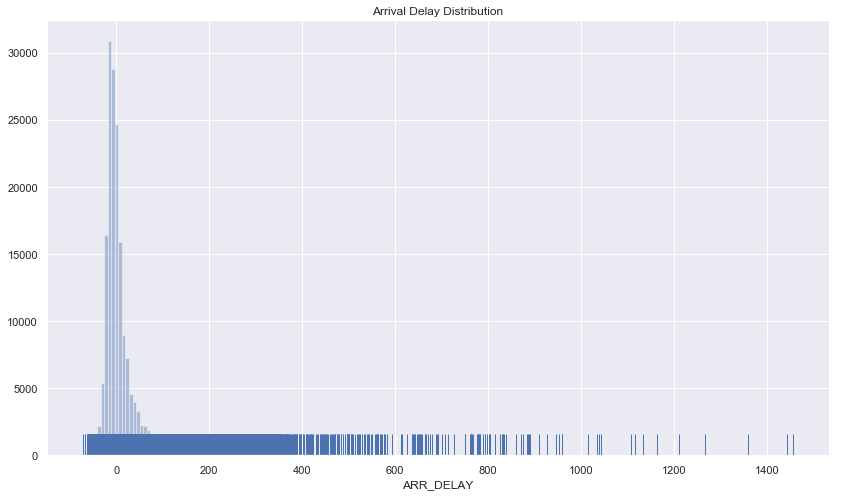

In [41]:
sns.distplot(df.ARR_DELAY, bins=200, kde=False, rug=True)
plt.title('Arrival Delay Distribution')

In [34]:
test2 = local.filter(items=['ORIGIN', 'ARR_DELAY'])

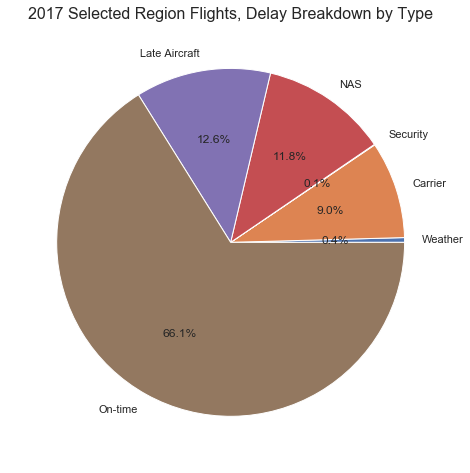

In [42]:
all_flights = df.YEAR.count()
on_time_df = df[df.ARR_DELAY <= 15]
delay_df = df[df.ARR_DELAY > 15]
on_time = on_time_df.YEAR.count()

weather = delay_df[delay_df.WEATHER_DELAY > 0].count()
carrier = delay_df[delay_df.CARRIER_DELAY > 0].count()
NAS = delay_df[delay_df.NAS_DELAY > 0].count()
security = delay_df[delay_df.SECURITY_DELAY > 0].count()
late_aircraft = delay_df[delay_df.LATE_AIRCRAFT_DELAY > 0].count()

weather_percent = weather.YEAR / all_flights
carrier_percent = carrier.YEAR / all_flights
NAS_percent = NAS.YEAR / all_flights
security_percent = security.YEAR / all_flights
late_aircraft_delay_percent = late_aircraft.YEAR / all_flights
no_delay_percent = on_time / all_flights

x = [weather_percent, carrier_percent, security_percent, NAS_percent, late_aircraft_delay_percent, no_delay_percent]

plt.pie(x, labels=['Weather', 'Carrier', 'Security', 'NAS', 'Late Aircraft', 'On-time'], autopct='%1.1f%%')
plt.title(f'{year} Selected Region Flights, Delay Breakdown by Type', fontsize=16)
plt.show()

## Questions
### 1. Does carrier delay percentage vary by carrier?
### 2. What is the delay percentage of flights coming into SFO? (Destenation airport is SFO) and how does that compare to the Late Aircraft percentage?


### FAA has data available for NAS delays, further broken down by category.
https://aspm.faa.gov/opsnet/sys/Delays.asp

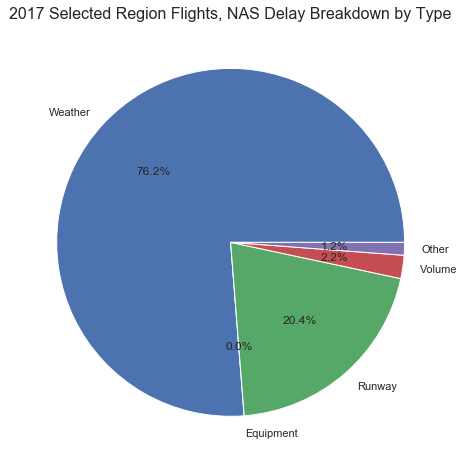

In [48]:
nas_delay = pd.read_csv('NAS_delay.csv')
NAS_by_year = nas_delay[(nas_delay.Year == float(year)) & nas_delay.Facility.isin([origin])]
total_time = NAS_by_year.groupby('Facility')['all Total min.'].sum().sort_index()
volume_time = NAS_by_year.groupby('Facility')['volume total'].sum().sort_index()
equipment_time = NAS_by_year.groupby('Facility')['Equipment total'].sum().sort_index()
runway_time = NAS_by_year.groupby('Facility')['runway total'].sum().sort_index()
other_time = NAS_by_year.groupby('Facility')['other total'].sum().sort_index()
weather_time = NAS_by_year.groupby('Facility')['Weather total'].sum().sort_index()

percent_volume = volume_time / total_time
percent_equipment = equipment_time / total_time
percent_runway = runway_time / total_time
percent_other = other_time / total_time
percent_weather = weather_time / total_time

total_time = total_time.sort_values(ascending=False)

percent_volume = percent_volume.get(total_time.index)[0:100]
percent_equipment = percent_equipment.get(total_time.index)[0:100]
percent_runway = percent_runway.get(total_time.index)[0:100]
percent_other = percent_other.get(total_time.index)[0:100]
percent_weather = percent_weather.get(total_time.index)[0:100]

all_weather = weather_time.sum() / total_time.sum()
all_equipment = equipment_time.sum() / total_time.sum()
all_runway = runway_time.sum() / total_time.sum()
all_volume = volume_time.sum() / total_time.sum()
all_other = other_time.sum() / total_time.sum()

x = [all_weather, all_equipment, all_runway, all_volume, all_other]

plt.pie(x, labels=['Weather', 'Equipment', 'Runway', 'Volume', 'Other'], autopct='%1.1f%%')
plt.title(f'{year} Selected Region Flights, NAS Delay Breakdown by Type', fontsize=16)
plt.show()

Weather delay average: 0.9722344747533372 mins.
Carrier delay average: 15.590644225188624 mins.
NAS delay average: 13.353313987231573 mins.
Security delay average: 0.07774811375507835 mins.
Late Aircraft delay average: 32.89845618107951 mins.


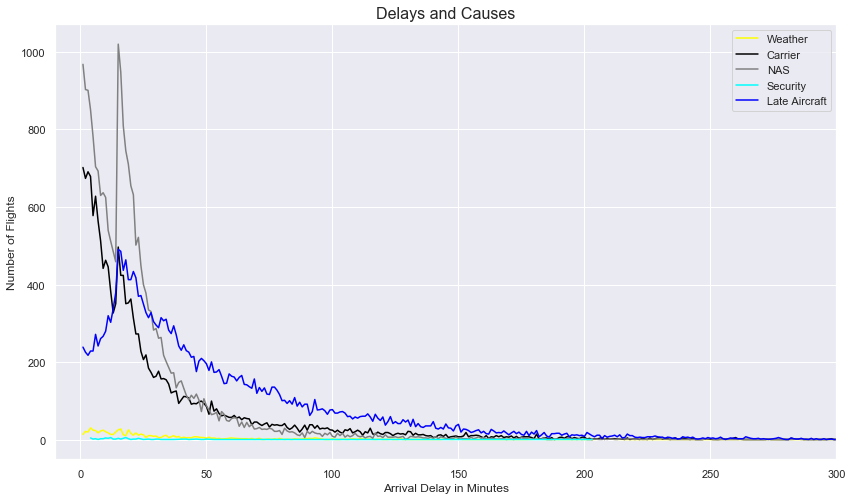

In [49]:
print(f'Weather delay average: {df.WEATHER_DELAY.mean()} mins.')
print(f'Carrier delay average: {df.CARRIER_DELAY.mean()} mins.')
print(f'NAS delay average: {df.NAS_DELAY.mean()} mins.')
print(f'Security delay average: {df.SECURITY_DELAY.mean()} mins.')
print(f'Late Aircraft delay average: {df.LATE_AIRCRAFT_DELAY.mean()} mins.')

df.groupby('WEATHER_DELAY').size()[1:].plot(color='yellow')
df.groupby('CARRIER_DELAY').size()[1:].plot(color='black')
df.groupby('NAS_DELAY').size()[1:].plot(color='gray')
df.groupby('SECURITY_DELAY').size()[1:].plot(color='cyan')
df.groupby('LATE_AIRCRAFT_DELAY').size()[1:].plot(color='blue')
plt.xlim(-10,300)
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Number of Flights')
plt.title('Delays and Causes', fontsize=16)
plt.legend(['Weather', 'Carrier', 'NAS', 'Security', 'Late Aircraft'])

### NAS - We can continue to look at patterns for heavy traffic or trends in increassing air traffic patterns areas and look for consitancies. Addionally, although extreme events are not considered here, normal weather patterns that cause air traffic slowdowns are. Looking at weather patterns may be beneficial. FAA has a database breaking down the NAS delays by cause. (FAA OPSNET)

### Carrier - carrier performance can be further analyzed by location and see if there are patterns

### Late Aircraft - This can be handled with arrival delay information. This field highly depends on the other delay causes.

# Evaluating congested times in a selected region

## Do busy times in a given region have a higher arrival delay time?

In [39]:
#define a useful function
def time_to_float(time):
    '''This function will convert time that is incorrectly represented into a float
    for easier plotting with matplotlib'''
    if len(str(int(time))) > 2:
        denom = time / 2400.0
        numer = (float(str(int(time))[:-2:]) + float(str(int(time))[-2:])/60)/24
        ratio = numer / denom
        time_float = time * ratio
    else:
        time_float = time / 60 * 100 
    return time_float

In [95]:
#we'll need to consider all arriving and departing traffic in the region to undestand congestion delays
arriving_flights = df_dest
departing_flights = df

In [96]:
#add columns converting departure and arrival time to hourly increments
arriving_flights['ARR_HOUR'] = arriving_flights['ARR_TIME'].apply(lambda x: int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))
arriving_flights['ARR_HOUR'] = arriving_flights['ARR_HOUR'].apply(lambda x:0 if x==24 else x)
departing_flights['DEP_HOUR'] = departing_flights['CRS_DEP_TIME'].apply(lambda x: int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))

In [97]:
arr_del = pd.DataFrame(arriving_flights.groupby('ARR_HOUR')['ARR_DELAY'].mean())
dep_del = pd.DataFrame(departing_flights.groupby('DEP_HOUR')['ARR_DELAY'].mean())

In [98]:
total_del = pd.merge(arr_del, dep_del, how='left', left_on=arr_del.index, right_on=dep_del.index)

In [99]:
total_del['sum'] = total_del['ARR_DELAY_x'] + total_del['ARR_DELAY_y']

In [100]:
total_del.drop(columns=['key_0'])

,ARR_DELAY_x,ARR_DELAY_y,sum
0,66.281879,-1.625105,64.656775
1,89.067599,10.110092,99.177691
2,162.657718,NaN,NaN
3,168.362903,199.000000,367.362903
4,-4.243719,NaN,NaN
5,-2.535193,-5.678955,-8.214148
6,-14.281016,-0.105176,-14.386192
7,-8.537178,-3.569897,-12.107076
8,-3.449254,1.902860,-1.546394
9,-4.115628,6.159223,2.043596


In [101]:
total_del.fillna(0)

,key_0,ARR_DELAY_x,ARR_DELAY_y,sum
0,0,66.281879,-1.625105,64.656775
1,1,89.067599,10.110092,99.177691
2,2,162.657718,0.000000,0.000000
3,3,168.362903,199.000000,367.362903
4,4,-4.243719,0.000000,0.000000
5,5,-2.535193,-5.678955,-8.214148
6,6,-14.281016,-0.105176,-14.386192
7,7,-8.537178,-3.569897,-12.107076
8,8,-3.449254,1.902860,-1.546394
9,9,-4.115628,6.159223,2.043596


In [102]:
arr = pd.DataFrame(arriving_flights.groupby('ARR_HOUR').size())
dep = pd.DataFrame(departing_flights.groupby('DEP_HOUR').size())

In [103]:
total = pd.merge(arr, dep, how='left', left_on=arr.index, right_on=dep.index)

In [104]:
total['sum'] = total['0_x'] + total['0_y']

In [105]:
total.drop(columns=['key_0'])

,0_x,0_y,sum
0,3725,2390.0,6115.0
1,1716,109.0,1825.0
2,447,NaN,NaN
3,124,1.0,125.0
4,796,NaN,NaN
5,753,1302.0,2055.0
6,3071,10221.0,13292.0
7,7612,8677.0,16289.0
8,8779,14124.0,22903.0
9,11390,12360.0,23750.0


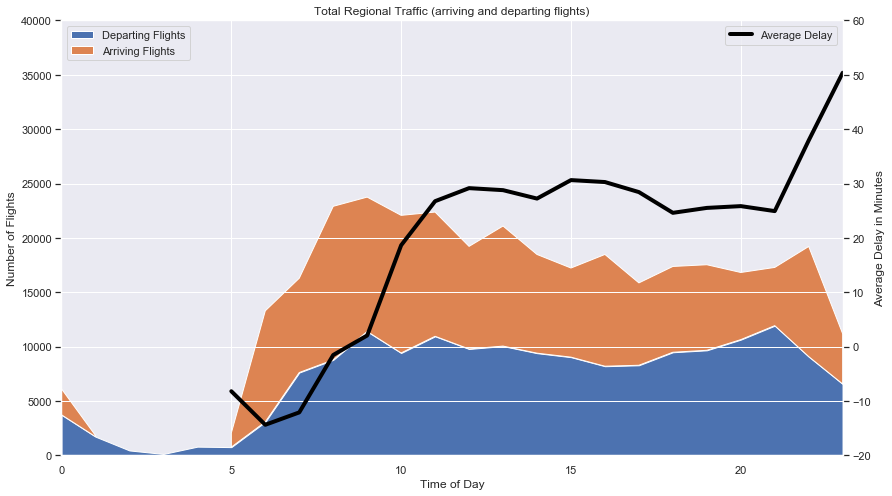

In [106]:
ax = plt.subplot(111)
y = [total['0_x'], total['0_y']]
x = total.index

ax.stackplot(x, y, labels=['Departing Flights','Arriving Flights'])
plt.legend(loc='upper left')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.title('Total Regional Traffic (arriving and departing flights)')
plt.ylim(0,40000)
plt.xlim(0,23)

ax2 = ax.twinx()
ax2.plot(total_del.index, total_del['sum'], color='black', linewidth=4)
plt.ylabel('Average Delay in Minutes')
plt.ylim(-20,60)
plt.legend(['Average Delay'], loc='upper right')

plt.show()

It looks like delays increase towards the evening hours of the day, but air traffic has no impact on delay times. There is a spike in the average delay mins. toward the night hours, which is due to some outliers around 1am.

### How do airlines perform throughout the week by hour. Is there a time of the week that results in more delays?

In [50]:
#add columns converting departure and arrival time to hourly increments
df['DEP_HOUR'] = df['CRS_DEP_TIME'].apply(lambda x: int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))
df['ARR_HOUR'] = df['ARR_TIME'].apply(lambda x: int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))

In [52]:
df_sub = df[['DAY_OF_WEEK','DEP_HOUR','OP_CARRIER','ARR_DELAY']]

In [53]:
df_sub['DAY_OF_WEEK'].replace(1,'Monday',inplace=True)
df_sub['DAY_OF_WEEK'].replace(2,'Tuesday',inplace=True)
df_sub['DAY_OF_WEEK'].replace(3,'Wednesday',inplace=True)
df_sub['DAY_OF_WEEK'].replace(4,'Thursday',inplace=True)
df_sub['DAY_OF_WEEK'].replace(5,'Friday',inplace=True)
df_sub['DAY_OF_WEEK'].replace(6,'Saturday',inplace=True)
df_sub['DAY_OF_WEEK'].replace(7,'Sunday',inplace=True)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [54]:
df_sub.head()

,DAY_OF_WEEK,DEP_HOUR,OP_CARRIER,ARR_DELAY
48,Tuesday,14,B6,-30.0
69,Tuesday,11,B6,58.0
90,Tuesday,13,B6,-45.0
160,Tuesday,7,B6,-6.0
200,Tuesday,21,B6,-24.0


In [55]:
monday = df_sub[df_sub.DAY_OF_WEEK == 'Monday']
monday = monday.reset_index()
monday = monday.drop(['index', 'OP_CARRIER', 'DAY_OF_WEEK'], axis=1)
monday = monday.groupby('DEP_HOUR').mean()

tuesday = df_sub[df_sub.DAY_OF_WEEK == 'Tuesday']
tuesday = tuesday.reset_index()
tuesday = tuesday.drop(['index', 'OP_CARRIER', 'DAY_OF_WEEK'], axis=1)
tuesday = tuesday.groupby('DEP_HOUR').mean()

wednesday = df_sub[df_sub.DAY_OF_WEEK == 'Wednesday']
wednesday = wednesday.reset_index()
wednesday = wednesday.drop(['index', 'OP_CARRIER', 'DAY_OF_WEEK'], axis=1)
wednesday = wednesday.groupby('DEP_HOUR').mean()

thursday = df_sub[df_sub.DAY_OF_WEEK == 'Thursday']
thursday = thursday.reset_index()
thursday = thursday.drop(['index', 'OP_CARRIER', 'DAY_OF_WEEK'], axis=1)
thursday = thursday.groupby('DEP_HOUR').mean()

friday = df_sub[df_sub.DAY_OF_WEEK == 'Friday']
friday = friday.reset_index()
friday = friday.drop(['index', 'OP_CARRIER', 'DAY_OF_WEEK'], axis=1)
friday = friday.groupby('DEP_HOUR').mean()

saturday = df_sub[df_sub.DAY_OF_WEEK == 'Saturday']
saturday = saturday.reset_index()
saturday = saturday.drop(['index', 'OP_CARRIER', 'DAY_OF_WEEK'], axis=1)
saturday = saturday.groupby('DEP_HOUR').mean()

sunday = df_sub[df_sub.DAY_OF_WEEK == 'Sunday']
sunday = sunday.reset_index()
sunday = sunday.drop(['index', 'OP_CARRIER', 'DAY_OF_WEEK'], axis=1)
sunday = sunday.groupby('DEP_HOUR').mean()

In [63]:
thursday = thursday.drop([3])

In [64]:
thursday.iloc[2]

ARR_DELAY   -7.914573
Name: 5, dtype: float64

In [65]:
new_df = pd.DataFrame()

In [66]:
new_df['Monday'] = monday.ARR_DELAY.values
new_df['Tuesday'] = tuesday.ARR_DELAY.values
new_df['Wednesday'] = wednesday.ARR_DELAY.values
new_df['Thursday'] = thursday.ARR_DELAY.values
new_df['Friday'] = friday.ARR_DELAY.values
new_df['Saturday'] = saturday.ARR_DELAY.values
new_df['Sunday'] = sunday.ARR_DELAY.values

In [67]:
new_df = new_df.reset_index()

In [68]:
new_df

,index,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,1.131653,-0.138973,-4.703593,-1.384196,0.117808,-3.008333,-4.068841
1,1,22.263158,9.583333,6.583333,1.611111,3.388889,31.944444,-15.000000
2,2,-4.600985,-6.283582,-8.492063,-7.914573,-2.573604,-6.808140,-2.404255
3,3,1.290096,-0.538411,-1.648612,1.032932,2.150223,-0.414616,-3.684120
4,4,-3.264774,-4.560703,-4.643134,-2.965596,-0.859568,-4.990231,-4.002720
5,5,3.190246,1.014706,1.855364,4.576923,6.525808,-3.007332,-1.696348
6,6,9.574155,5.084251,4.854075,8.649891,9.404775,1.769588,2.743739
7,7,16.246377,7.886152,12.504881,14.686009,16.316272,6.775588,6.867099
8,8,17.841981,12.467595,15.691081,18.693817,24.570149,9.855024,11.325581
9,9,15.690029,6.594555,9.764402,13.701023,19.664488,3.736713,10.873907


In [71]:
line = pd.DataFrame({"index": 0.0, "Monday": 0.0, "Tuesday": 0.0, "Wednesday": 0.0, "Thursday": 0.0,
                 "Friday": 0.0, "Saturday": 0.0, "Sunday": 0.0,}, index=[1.5])
new_df = new_df.append(line, ignore_index=False)
new_df = new_df.sort_index().reset_index(drop=True)

In [72]:
new_df = new_df.drop(columns=['index'])

In [73]:
hour_day = new_df.copy()

In [74]:
hour_day.index = hour_day.index.astype(str)

In [75]:
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter
from bokeh.transform import transform

In [108]:
hour_day.columns.name = 'Day'

test = pd.DataFrame(hour_day.stack(), columns=['ARR_DELAY']).reset_index()
source = ColumnDataSource(test)

colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=test.ARR_DELAY.min(), high=test.ARR_DELAY.max())
heatmap = figure(plot_width=900, plot_height=300, title='Average Flight Delays by Day and Hour for All Airlines',
                 x_range=list(hour_day.index), y_range=list(hour_day.columns))
heatmap.rect(x='level_0', y="Day", width=1, height=1, source=source,
       line_color=None, fill_color=transform('ARR_DELAY', mapper))


color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)))

heatmap.add_layout(color_bar, 'right')

heatmap.xaxis.axis_label = 'Departure Hour'
heatmap.yaxis.axis_label = 'Day of the Week'

heatmap.axis.axis_line_color = None
heatmap.axis.major_tick_line_color = None
heatmap.axis.major_label_text_font_size = "8pt"
heatmap.axis.major_label_standoff = 0
heatmap.xaxis.major_label_orientation = 1.0

show(heatmap)

<img src="bokeh_plot_SFO.png">

We see that Monday, Thursday, Friday, and Sunday afternoons seem particularly busy for this region. There is also some darker areas on Monday and Saturday at 1 am. This may be due outliers and will be investigated. 